In [1]:
from dot_plots import *
import Merge_Cartesian as MC


%matplotlib widget
plt.rcParams["figure.figsize"] = (7, 7)

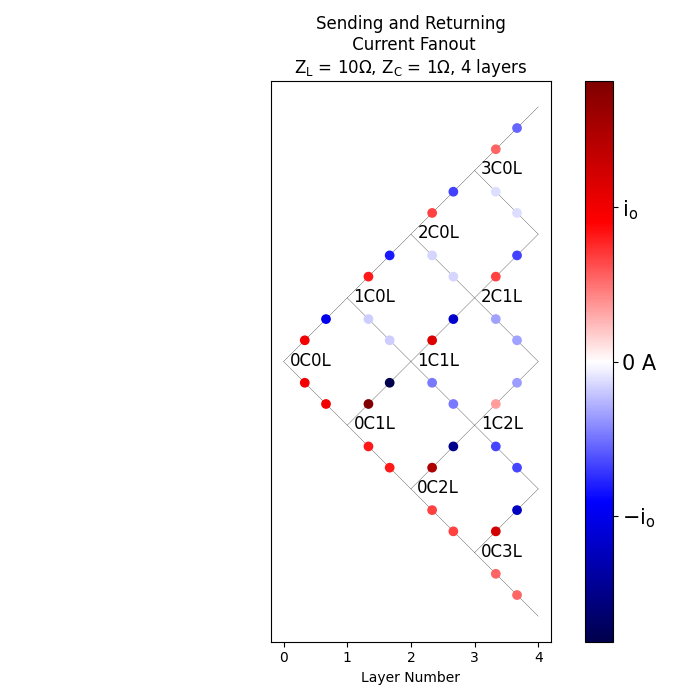

In [2]:
plot_sending_and_receiving('10','1',4,1,
                         False,
                         True,
                         False,'plots/',True)

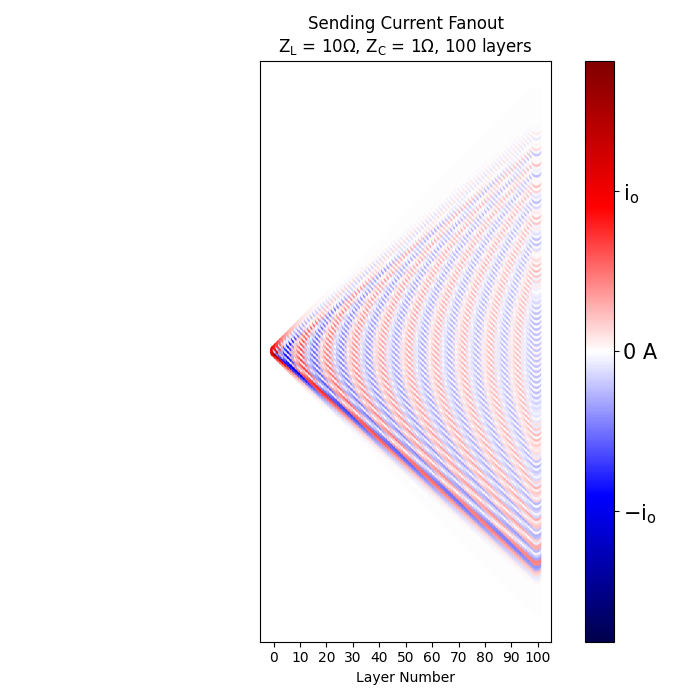

In [3]:
plot_sending_or_receiving('10','1',100,10,
                         False,
                         True,True,
                         False,'plots/')

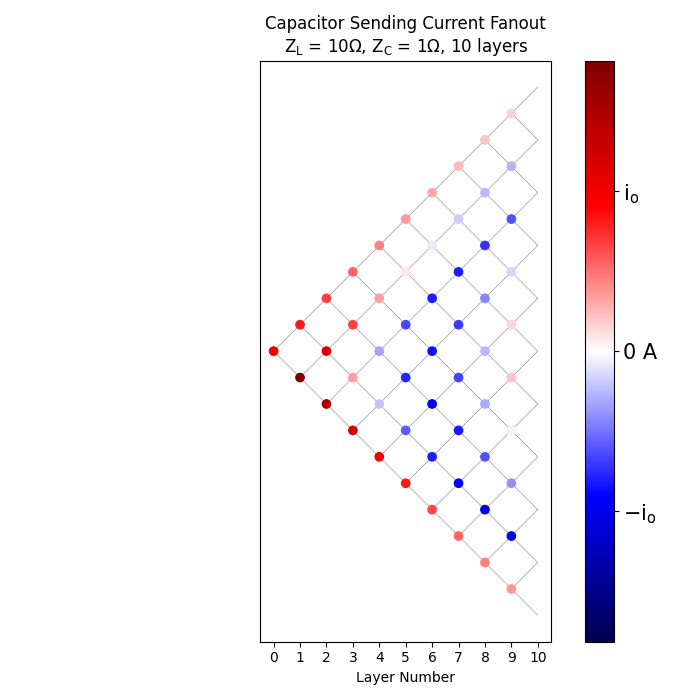

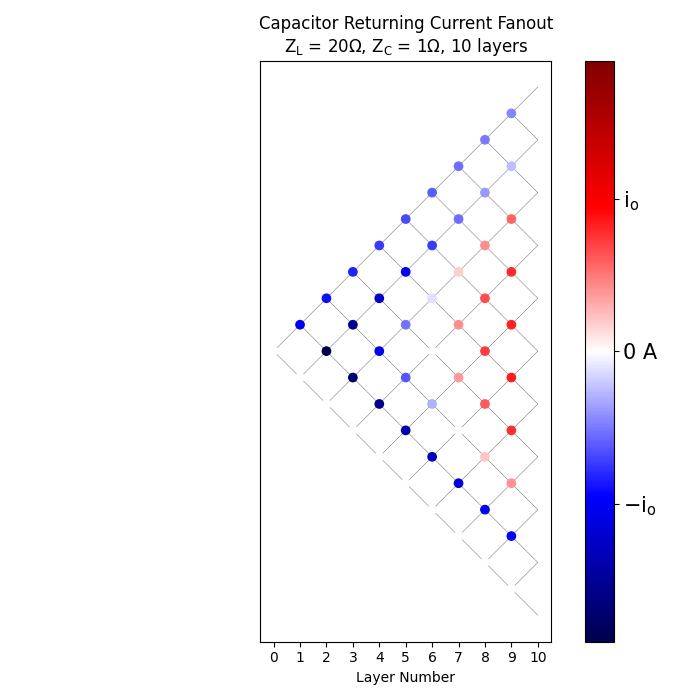

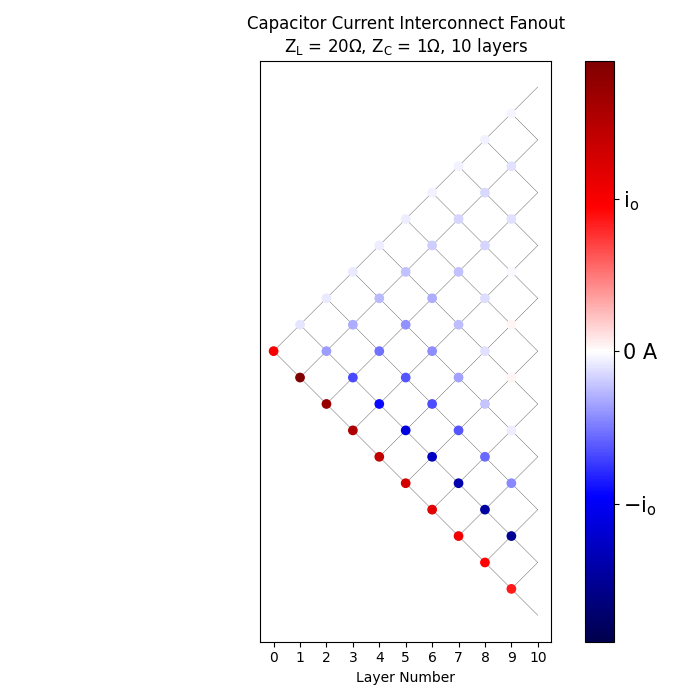

In [4]:
plot_single_transmission('10','1',10,1,
                         False,
                         True,True,True,
                         True,'plots/net/',False,True)
plot_single_transmission('20','1',10,1,
                         False,
                         True,False,True,
                         True,'plots/net/',False,True)
plot_interconnect('20','1',10,1,
                         False,
                         True,True,
                         True,'plots/net/',False,True)

val1 = True
val2 = True
val3 = True

for i in range (1,9):
    print(i,val1,val2,val3)
    plot_single_transmission('10','1',100,11,
                         False,
                         val1,val2,val3,
                         False,'plots/')
    
    val3 = not val3
    if i%2 == 0:
        val2 = not val2
        
    if i%4 == 0:
        val1 = not val1

In [5]:
L_Time = '10'
C_Time = '10'

L_impedance = '20'
C_impedance = '1'

L_Time_2 = '60'
C_Time_2 = '39'

L_impedance_2 = '100'
C_impedance_2 = '1'

number_periods = '1'

                 #  IMPEDANCE     ,TIME    ,LENGTH
Inductor_List =    [L_impedance   ,L_Time  ,'1']
Capacitor_List =   [C_impedance   ,C_Time  ,'1']
Inductor_List_2 =  [L_impedance_2 ,L_Time_2,'1']
Capacitor_List_2 = [C_impedance_2 ,C_Time_2,'1']

              #   VOLTAGE  , PERIODS       , BUCK , LOAD
Circuit_List =   ['1'      , number_periods, False, '12']
Circuit_List_2 = ['1'      , number_periods, False, '12']

(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List)

(data_input_2,
data_output_2,
data_output_merged_2, 
data_output_ordered_2) = MC.Full_Cycle(Inductor_List_2,Capacitor_List_2, Circuit_List_2)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        100
Inductor Capacitance Per Length :       0.25
Inductor Length :                       1
Inductor Total Inductance :             100
Inductor Total Capacitance :            0.25
Inductor Velocity :                     0.2
Inductor Time Delay :                   5
Inductor Impedance :                    20

- The Capacitor -
Capacitor Inductance Per Length :       5
Capacitor Capacitance Per Length :      5
Capacitor Length :                      1
Capacitor Total Inductance :            5
Capacitor Total Capacitance :           5
Capacitor Velocity :                    0.2
Capacitor Time Delay :                  5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  140.4962946208237745201807280
Number of Wavefronts :                  544
Number of Layers :                      16
A :                        

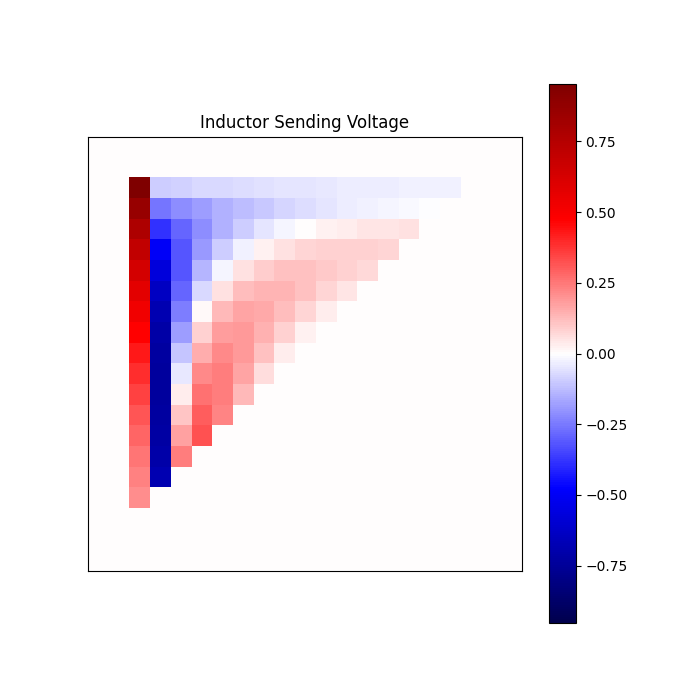

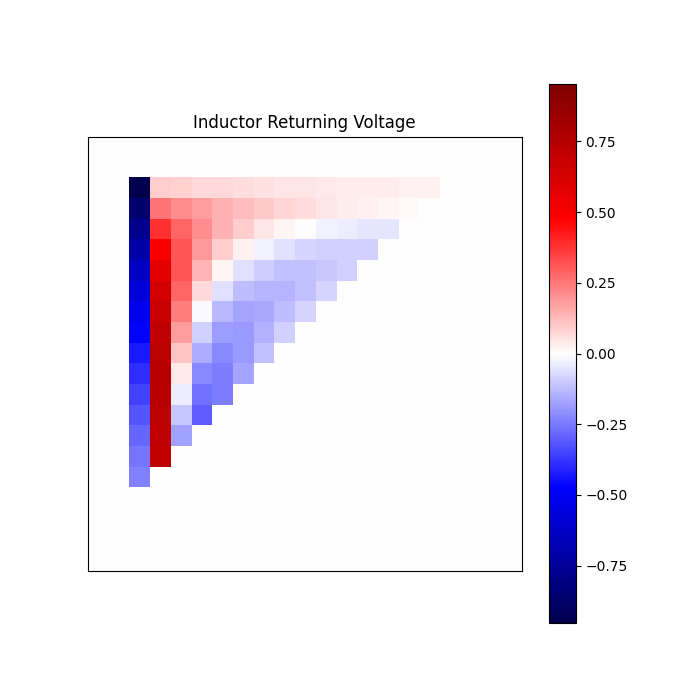

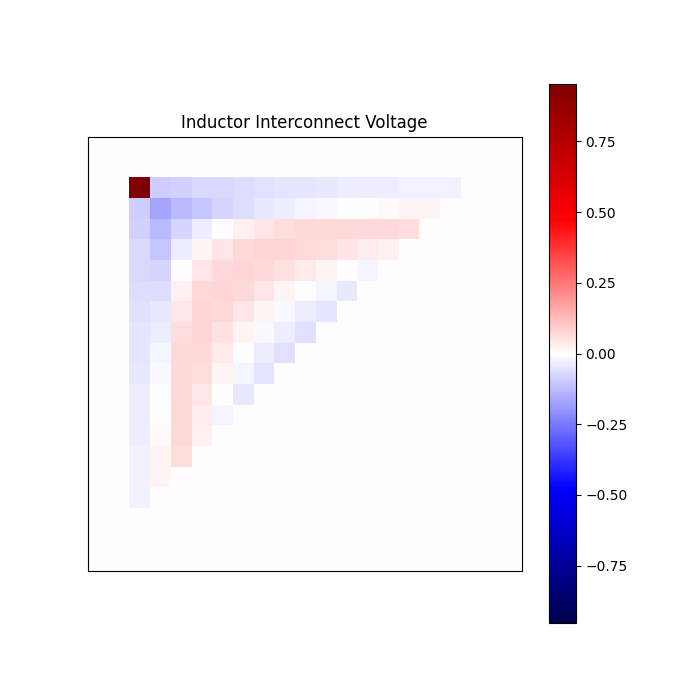

In [6]:
fig_0, ax_0 = plt.subplots()
fig_1, ax_1 = plt.subplots()
fig_zero, ax_zero = plt.subplots()

ax_0.get_xaxis().set_ticks([])
ax_0.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_sending("voltage inductor")
                       ,ax_0,"Inductor Sending Voltage",True,False,2)

ax_1.get_xaxis().set_ticks([])
ax_1.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_returning("voltage inductor")
                       ,ax_1,"Inductor Returning Voltage",True,False,2)
ax_zero.get_xaxis().set_ticks([])
ax_zero.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.Voltage_Interconnect_Inductor
                       ,ax_zero,"Inductor Interconnect Voltage",True,False,2)

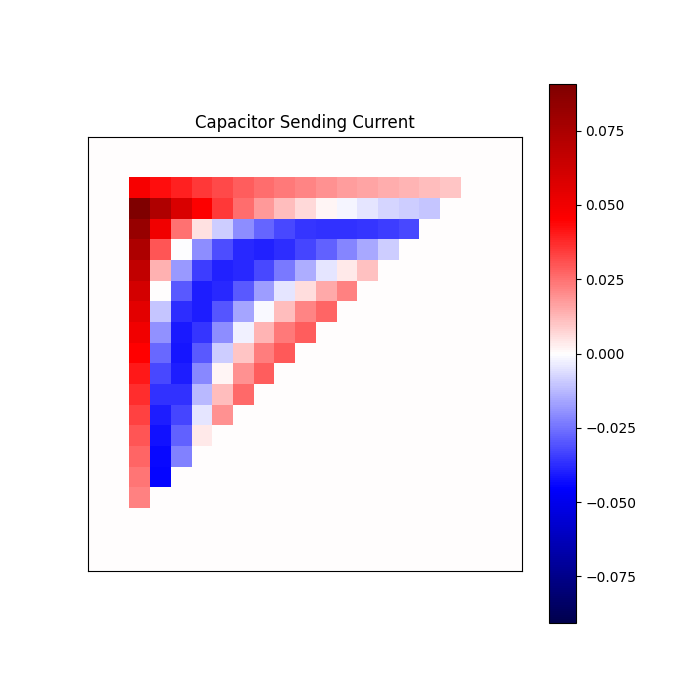

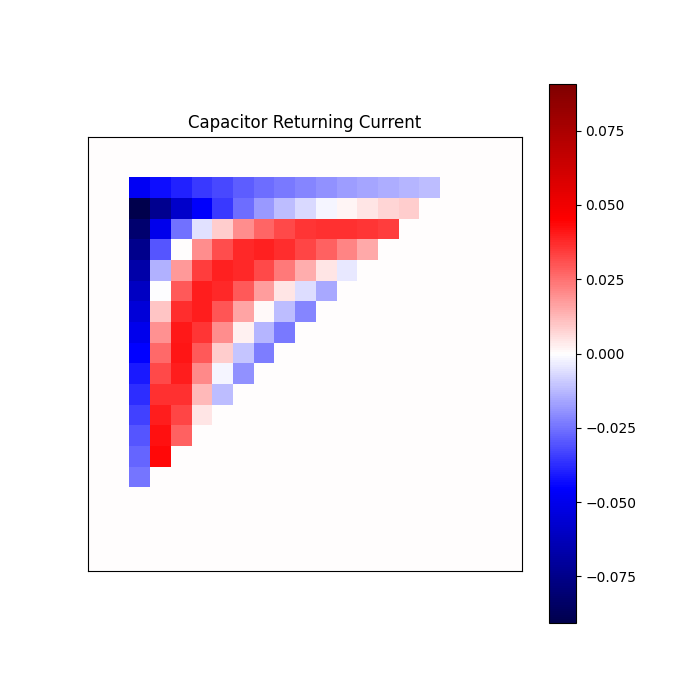

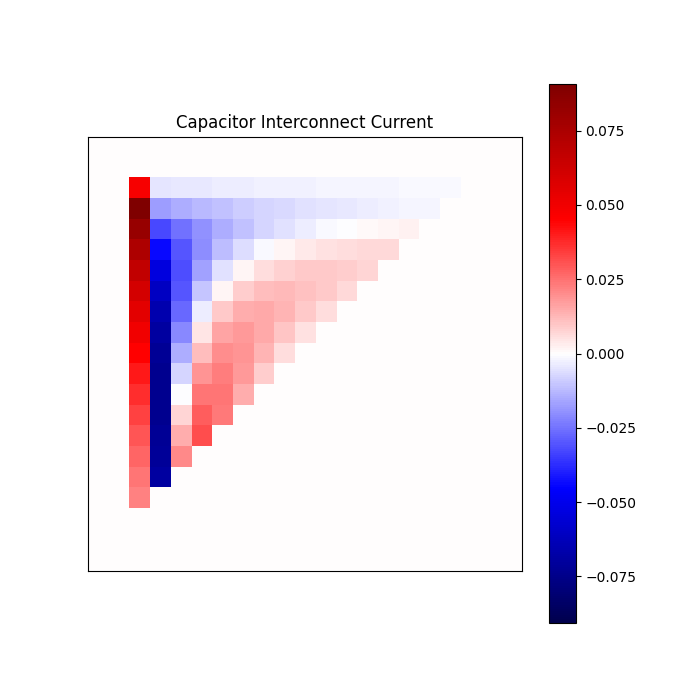

In [7]:
fig_0, ax_0 = plt.subplots()
fig_1, ax_1 = plt.subplots()
fig_zero, ax_zero = plt.subplots()

ax_0.get_xaxis().set_ticks([])
ax_0.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_sending("Current capacitor")
                       ,ax_0,"Capacitor Sending Current",True,False,2)

ax_1.get_xaxis().set_ticks([])
ax_1.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_returning("Current capacitor")
                       ,ax_1,"Capacitor Returning Current",True,False,2)
ax_zero.get_xaxis().set_ticks([])
ax_zero.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.Current_Interconnect_Capacitor
                       ,ax_zero,"Capacitor Interconnect Current",True,False,2)

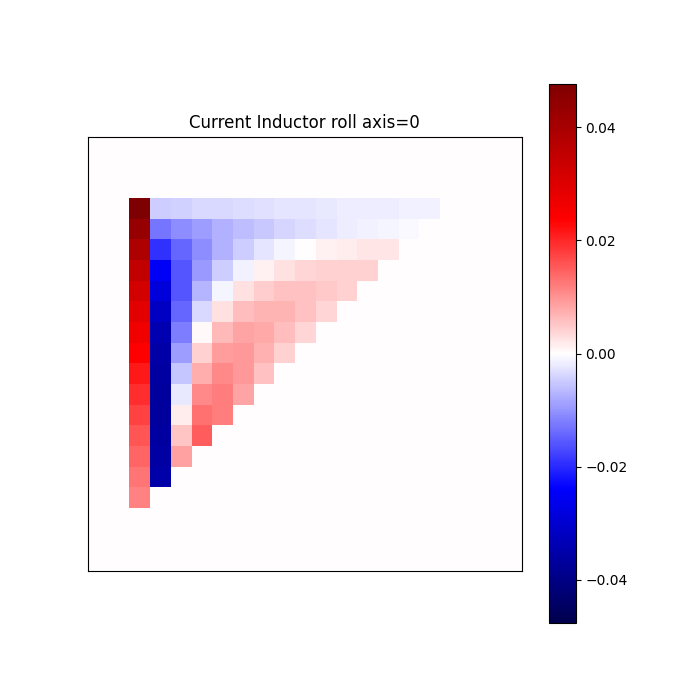

In [8]:
fig_one, ax_one = plt.subplots()

ax_one.get_xaxis().set_ticks([])
ax_one.get_yaxis().set_ticks([])

MC.plot_fanout_seismic((np.roll(data_output.get_returning("current inductor"),1,axis=0))
                       ,ax_one,"Current Inductor roll axis=0",True,False,2)


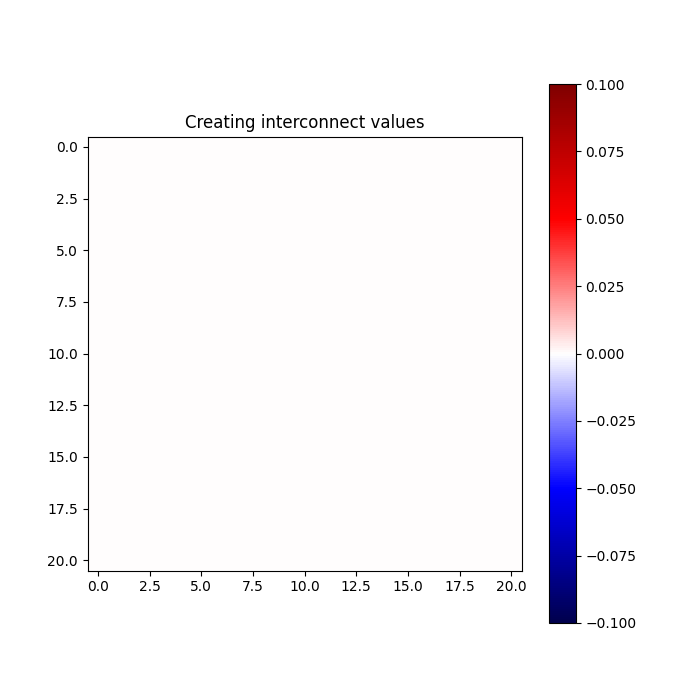

In [9]:
fig_two, ax_two = plt.subplots()
MC.plot_fanout_seismic(data_output.get_sending("current capacitor") +(np.roll(data_output.get_returning("current capacitor"),1)) - data_output.Current_Interconnect_Capacitor,
                       ax_two,"Creating interconnect values",True,False,2)

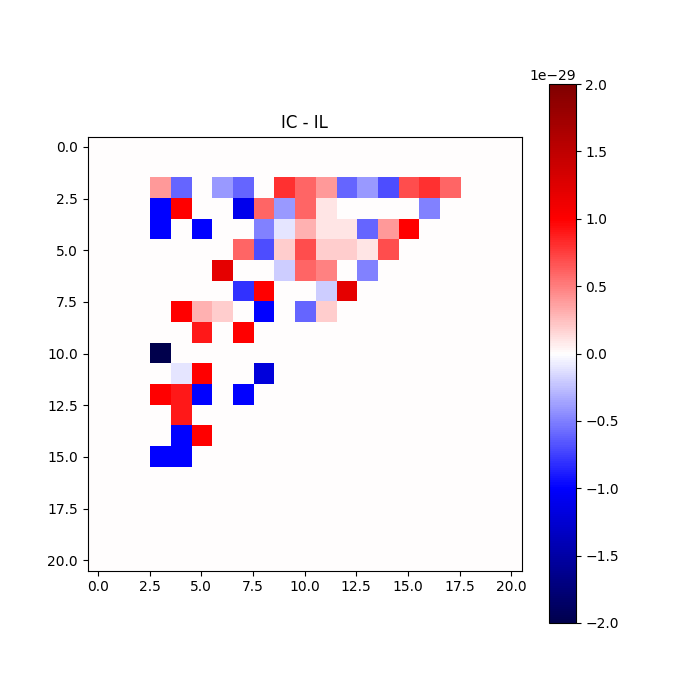

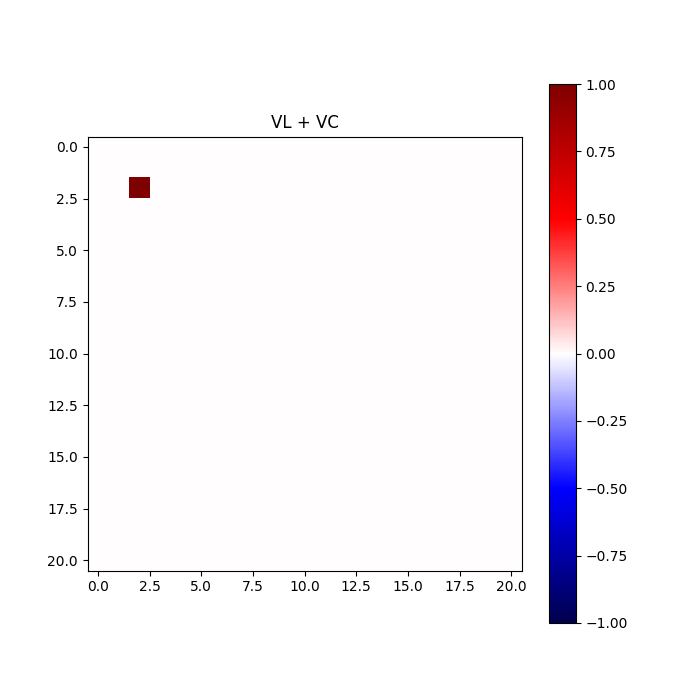

In [10]:
fig_three, ax_three = plt.subplots()
MC.plot_fanout_seismic(data_output.Current_Interconnect_Capacitor - data_output.Current_Interconnect_Inductor,
                       ax_three,"IC - IL",True,False,2)
fig_four, ax_four = plt.subplots()
MC.plot_fanout_seismic(data_output.Voltage_Interconnect_Capacitor + data_output.Voltage_Interconnect_Inductor,
                       ax_four,"VL + VC",True,False,2)